In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import sys
sys.path.append('../src')
from visual_corr import cat_cat, cont_cont, cat_cont, cont_label, cat_label, corr, drawRow
from utils import no_accent_vietnamese

NOTE
FIELD_1: sure
FIELD_3: only None
maCv: not done yet, but suggest NaN, None, other
FIELD_6: 0.0 higher, > 1.5|0.5 is lower
FIELD_7: considered as binary set
FIELD_10: None and GH is significant
FIELD_11: only None, others dont help
FIELD_12: None, LNONE helps
FIELD_13: only None, others dont help
FIELD_16: only None, others dont help
    
FIELD_22: 0 high, 1-44 low, 44-100 high
FIELD_37: only None, others dont help
FIELD_50: None helps, also maybe 29.770, 60.946 have higher, above have lower
FIELD_51: 0 high, 1-44 low, 44-100 high
FIELD_54: maybe 0,0.12 have higher, above have lower, None helps
FIELD_55: None 
FIELD_56: 0 lower, above higher
FIELD_57: 0 lower, above higher



In [4]:
train = pd.read_csv('../data/train.csv')

/home/loitg/miniconda2/envs/creditscore/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
train1 = train[train.isnull().sum(axis=1) <= 40]
train0 = train[train.isnull().sum(axis=1) > 40]

In [5]:
a = train0.isnull().sum() 
a[a<9678]

id                0
label             0
province       8059
district       8061
age_source1    8058
FIELD_1           0
FIELD_2         463
FIELD_3         463
FIELD_4         463
FIELD_5         463
FIELD_6         463
FIELD_7         463
FIELD_9           0
FIELD_14          0
FIELD_15          0
FIELD_32          0
FIELD_33          0
FIELD_34          0
FIELD_46          0
FIELD_47          0
FIELD_48          0
FIELD_49          0
dtype: int64

In [7]:
class FeatureFromColumn(object):
    
    def __init__(self, colname, lblname):
        self.colname = colname
        self.lblname = lblname
        self.excls = []
        self.repl = {}
        self.groups = {}
        self.isSure = False

In [12]:
def doo(data0, f, long_independence_test=True, **kwargs):
    col = f.colname
    data = data0.copy()
    # excl in replace
    for excl in f.excls:
#         if callable(f.excl) :
#             data = data[~data[col].apply(f.excl)]
        if isinstance(excl, tuple):
            data = data[(data[col] >= excl[0]) & (data[col] <= excl[1])]
        elif isinstance(excl, list):
            data = data[~data[col].isin(excl)]
        else:
            data = data[data[col] != excl]
    for repl in f.repls:
        if isinstance(repl, dict):
            data[col].replace(repl, inplace=True)
        elif callable(repl):
            data[col] = data[col].apply(repl)
        
    # transform
    if f.groups:
        if isinstance(f.groups, dict) and len(f.groups) > 0:
            def tt(x):
                for name, g_range in f.groups.items():
                    if isinstance(g_range, tuple):
                        if (x >= g_range[0]) and (x <= g_range[1]):
                            return name
                    elif isinstance(g_range, list):
                        if x in g_range:
                            return name
                    elif callable(g_range):
                        if g_range(x):
                            return name
                return x
            data[col] = data[col].apply(tt)
    
#     vc = data[col].value_counts(dropna=False)
#     vc.reset_index().to_html('./simplify_temp/value_count_0.html')
#     vc.sort_index().reset_index().to_html('./simplify_temp/value_count_sv.html')
    
    d = corr(data, col, 'cat', None, None, f.lblname, './simplify_temp/' , 'test_sort', 0, figsize=(18,18), **kwargs)
    d.to_html('./simplify_temp/value_count_sv.html') 
    if long_independence_test:
        d = corr(data, col, 'cat', None, None, f.lblname, './simplify_temp/' , 'test', 6, sort_count=True, figsize=(12,12), **kwargs)
        d.to_html('./simplify_temp/value_count_0.html')
    return d
        

In [8]:
train1.columns

Index(['id', 'label', 'province', 'district', 'age_source1', 'age_source2',
       'maCv', 'FIELD_1', 'FIELD_2', 'FIELD_3', 'FIELD_4', 'FIELD_5',
       'FIELD_6', 'FIELD_7', 'FIELD_8', 'FIELD_9', 'FIELD_10', 'FIELD_11',
       'FIELD_12', 'FIELD_13', 'FIELD_14', 'FIELD_15', 'FIELD_16', 'FIELD_17',
       'FIELD_18', 'FIELD_19', 'FIELD_20', 'FIELD_21', 'FIELD_22', 'FIELD_23',
       'FIELD_24', 'FIELD_25', 'FIELD_26', 'FIELD_27', 'FIELD_28', 'FIELD_29',
       'FIELD_30', 'FIELD_31', 'FIELD_32', 'FIELD_33', 'FIELD_34', 'FIELD_35',
       'FIELD_36', 'FIELD_37', 'FIELD_38', 'FIELD_39', 'FIELD_40', 'FIELD_41',
       'FIELD_42', 'FIELD_43', 'FIELD_44', 'FIELD_45', 'FIELD_46', 'FIELD_47',
       'FIELD_48', 'FIELD_49', 'FIELD_50', 'FIELD_51', 'FIELD_52', 'FIELD_53',
       'FIELD_54', 'FIELD_55', 'FIELD_56', 'FIELD_57'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

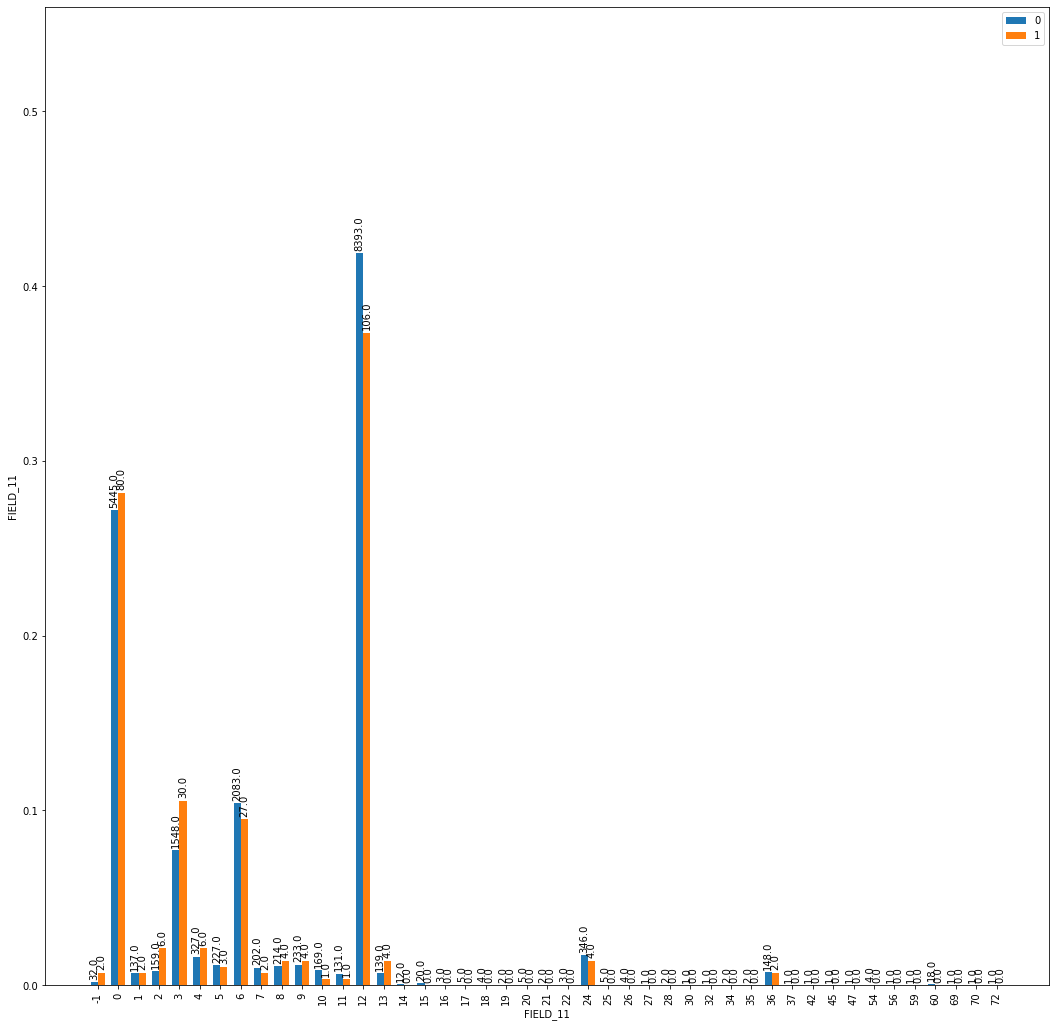

In [13]:
current_col = 'FIELD_11'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = [{'None':'-1'}, pd.to_numeric]
f.groups = {}
f.isSure = True
d = doo(train1, f, long_independence_test=False)

<Figure size 432x288 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

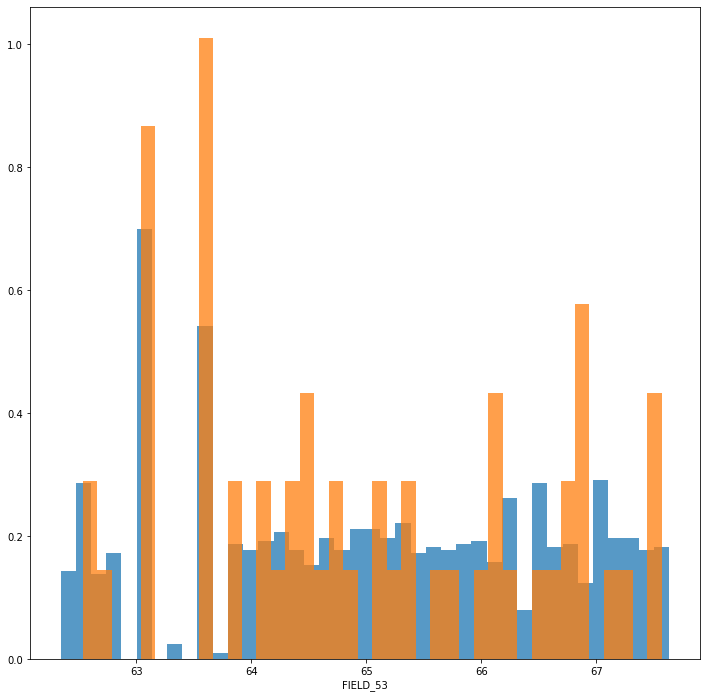

In [168]:
data = train1[(train1.FIELD_53 > 32)]
corr(data, 'FIELD_53', 'cont', None, None, 'label', './temp' , 'test', 6, figsize=(12,12), binCount=40)

In [128]:
d.index

Index(['VU', 'SC', 'SE', 'IT', 'IL', 'TK', 'TL', 'ES', 'DM', 'TR', 'PH', 'AU',
       'CA', 'AE', 'DT', 'TS', 'GB', 'BE', 'N', 'DK', 'AD', 'NN', 'NL', 'FR',
       'IN', 'NU', 'MY', 'TH', 'US', 'DE', 'KP', 'SG', 'HK', 'DL', 'UK', 'HQ',
       '1', 'CZ', 'TQ', 'CN', 'JP', 'KR', 'TW', 'None', 'VN'],
      dtype='object', name='FIELD_39')

In [35]:
train1.shape

(20322, 64)

In [176]:
current_col = 'FIELD_1'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True
current_col = 'FIELD_5'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {'A':(-1,0.5), 'B':(0.5,15)}
f.isSure = True
current_col = 'FIELD_6'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {'A':(-1,0.5), 'B':(0.5,15)}
f.isSure = True # Plausible, dont know
current_col = 'FIELD_7'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = [{np.nan:''}]
f.groups = {'LNone':lambda x: len(x.strip())==0, \
            'Empty':lambda x: len(x.strip())==2, \
            'Not-Empty':lambda x: len(x.strip())>2}
f.isSure = True
current_col = 'FIELD_8'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True
current_col = 'FIELD_10'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True # plausible
current_col = 'FIELD_11'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = [{'None':'-1'}, pd.to_numeric]
f.groups = {'SHORT':(-2,5.5), 'LONG':(5.5,100)}
f.isSure = True 
current_col = 'FIELD_12'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True 
current_col = 'FIELD_14'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True
current_col = 'FIELD_15'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True
current_col = 'FIELD_17'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True
current_col = 'FIELD_18'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True
current_col = 'FIELD_19'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True
current_col = 'FIELD_20'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True
current_col = 'FIELD_22'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = [{np.nan:'None'}, pd.to_numeric]
f.groups = {'A':(-0.5,0.5), 'B':(0.5,44.5), 'C':(44.5,100.5),'D':(100.5,1000)}
f.isSure = True
current_col = 'FIELD_25'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True
current_col = 'FIELD_26'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True
current_col = 'FIELD_29'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True
current_col = 'FIELD_30'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True
current_col = 'FIELD_31'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True
current_col = 'FIELD_46'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True
current_col = 'FIELD_47'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True #plausible
current_col = 'FIELD_48'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True #plausible
current_col = 'FIELD_51'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {'A':(-0.5,7.5), 'B':(7.5,44.5), 'C':(44.5,500.5)}
f.isSure = True #a little plausible, is it because random in long range ?
current_col = 'FIELD_52'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {'A':(29,32), 'B':(60,80)}
f.isSure = True 
current_col = 'FIELD_53'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {'A':(29,32), 'B':(60,80)}
f.isSure = True 
current_col = 'FIELD_54'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {'A':(-1,0.13),'B':(0.13,1.2)}
f.isSure = True #plausible, is it because random in long range ?
current_col = 'FIELD_56'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {'A':(-1,0.001), 'B':(0.001,1.2)}
f.isSure = True
current_col = 'FIELD_57'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {'A':(-1,0.001), 'B':(0.001,1.2)}
f.isSure = True

In [170]:
current_col = 'FIELD_2'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = False
current_col = 'FIELD_4'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {'A':(-1,0), 'B':(1,13)}
f.isSure = False
current_col = 'FIELD_4'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = False
current_col = 'FIELD_9'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {'GD':['GD'], 'DN':['DN'], 'O':['79', '86', 'CC', 'MS', 'XN', '80', 'NO', 'XV', 'TC', 'TE', '75', 'TS',\
       'CB', 'HD', 'KC', 'TA', 'HX', 'HS', 'BT', 'TK', 'NN', 'HT', 'XD', 'HN',\
       'XK', 'CN', 'DT', 'SV', 'DK', 'GB', 'CH', 'HC', 'TN']}
f.isSure = False
current_col = 'FIELD_16'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = False
current_col = 'FIELD_33'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = False
current_col = 'FIELD_34'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = False
current_col = 'FIELD_35'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = False
current_col = 'FIELD_36'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = False
current_col = 'FIELD_37'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = False
current_col = 'FIELD_39'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {'VN':['VN'], 'None':['None'], 'Rest':['VU', 'SC', 'SE', 'IT', 'IL', 'TK', 'TL', 'ES', 'DM', 'TR', 'PH', 'AU',\
       'CA', 'AE', 'DT', 'TS', 'GB', 'BE', 'N', 'DK', 'AD', 'NN', 'NL', 'FR',\
       'IN', 'NU', 'MY', 'TH', 'US', 'DE', 'KP', 'SG', 'HK', 'DL', 'UK', 'HQ',\
       '1', 'CZ', 'TQ', 'CN', 'JP', 'KR', 'TW']}
f.isSure = False # plausible
current_col = 'FIELD_40'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = False # plausible
current_col = 'FIELD_41'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = False
current_col = 'FIELD_43'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = False
current_col = 'FIELD_44'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = False
current_col = 'FIELD_45'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = False
current_col = 'FIELD_49'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = False # plausible
current_col = 'FIELD_50'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {'A':(29,30),'B':(55,70)}
f.isSure = False
current_col = 'FIELD_54'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = False

In [39]:
Fprovince_ext = pd.read_csv('./Fprovince_ext.csv')
data1 = Fprovince_ext.loc[train1.index]
data1.vung

1         DNB
2         DNB
4         DNB
6         NaN
7         DBB
         ... 
29992    DBSH
29994     NaN
29995     BTB
29996     DNB
29998    DBSH
Name: vung, Length: 20322, dtype: object

<Figure size 432x288 with 0 Axes>

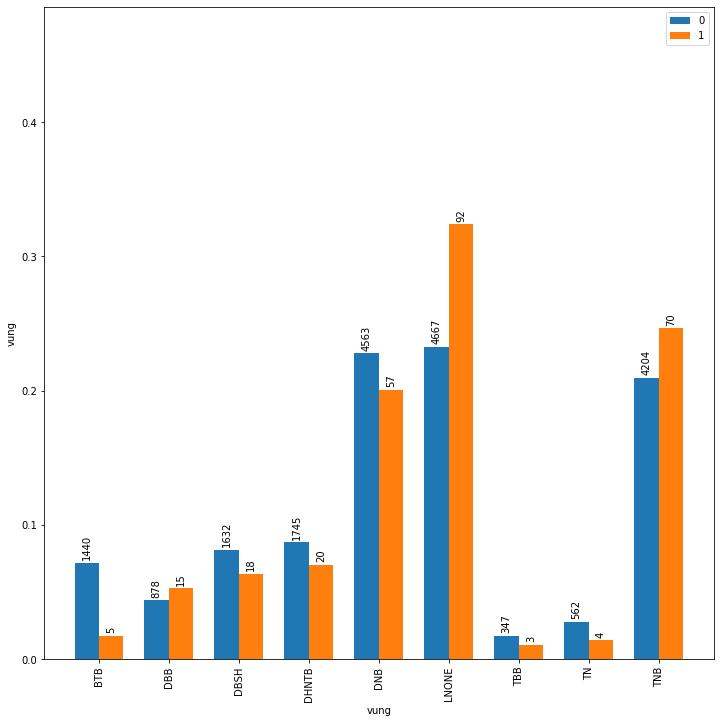

In [40]:
current_col = 'vung'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = [{np.nan:'LNONE'}]
f.groups = {}
f.isSure = True

d = doo(data1, f, long_independence_test=False)

In [253]:
F7ext = pd.read_csv('./F7ext.csv')
data1 = F7ext.loc[train1.index]
data1 = data1[train1.FIELD_7.apply(lambda x:len(x) > 2)]
print(data1.shape)
data1.columns

(15364, 38)


Index(['XN', 'CC', 'HN', 'TQ', 'DN', 'XK', 'CN', 'TB', 'GD', 'HD', 'HS', 'CH',
       'CB', 'HT', 'HC', 'XD', 'NO', 'KC', 'TK', 'DT', 'TS', 'CK', 'GB', 'TA',
       'HX', 'TN', 'NN', 'SV', 'TC', 'TE', 'XV', 'MS', 'PV', 'DK', 'BT',
       'f7total', 'f7count', 'label'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

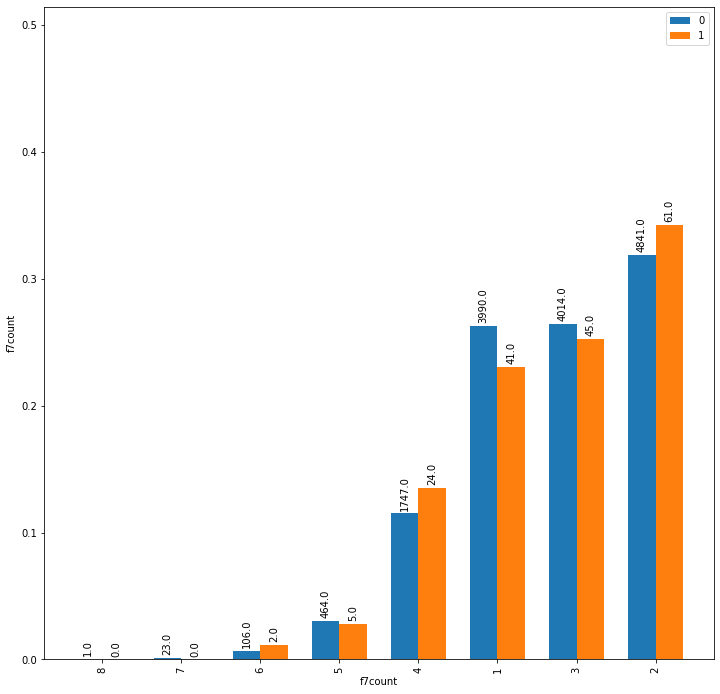

In [259]:
current_col = 'f7count'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True

f.repls = [{np.nan:'None'}]
d = doo(data1, f, long_independence_test=True)

In [ ]:
current_col = 'CH'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True #plausible
current_col = 'f7count'
f = FeatureFromColumn(current_col, 'label')
f.excls = []
f.repls = []
f.groups = {}
f.isSure = True #plausible